# Misc
- Parameters used by the models
- Dataset statistics (how many examples there are in total, how many comments/posts/notes from each resource and the average number, the total number of tokens of the whole dataset (with that of chatGPT: https://github.com/openai/tiktoken))
- Final results (2 classification strategies)

# Parameters used by models

In [1]:
import sys
ROOT = '../'
sys.path.append(ROOT)  # Add the root folder to the sys.path

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
from config import *

In [ ]:
# Define the new data structure for models and their parameters
data = {
    r"$\mathbf{Models / Parameters}$": [r"$\mathbf{Gemini}$", r"$\mathbf{Phi}$", r"$\mathbf{Mistral}$", r"$\mathbf{Llama}$", r"$\mathbf{Qwen}$"],
    r"$\mathbf{MAX\_TOKENS}$": [1048576, 131072, 131072, 131072, 131072],
    r"$\mathbf{TEMPERATURE}$": [0.1, 0.8, 0.8, 0.8, 0.8],
    r"$\mathbf{TOP\_P}$": [0.9, 0.4, 0.4, 0.4, 0.4],
    r"$\mathbf{TOP\_K}$": [0.64, 0.9, 0.9, 0.9, 0.9]
}

# Create a dataframe
df = pd.DataFrame(data)

# Create a figure and axis for displaying the table
fig, ax = plt.subplots(figsize=(10, 2))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Adjust table scale for better readability
table.scale(1.5, 1.5)

# Set a title for the table
plt.title("Models Parameters")

# Display the table
plt.show()

# Save the plot as pdf file
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "models_parameters.pdf")
fig.savefig(path, bbox_inches='tight')
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "models_parameters.png")
fig.savefig(path, bbox_inches='tight')

# Dataset statistics

- How many examples there are in total, how many comments/posts/news from each resource, and the average number, the total number of tokens of the whole dataset (with that of chatGPT: https://github.com/openai/tiktoken)

In [5]:
import sys
ROOT = '../'
sys.path.append(ROOT)  # Add the root folder to the sys.path

In [6]:
import os
import pandas as pd

In [7]:
from config import *

In [ ]:
# Load merged dataset from the file
path = os.path.join(ROOT, MERGED_DATASET_PATH, "merged_daily.csv")
df = pd.read_csv(path)

# Display the first 5 rows of the dataset
df.head()

In [ ]:
# Count the number of news, posts and comments (total and mean) for each source
# Count also the total number of tokens using ChatGPT tokenizer

import ast
from tqdm import tqdm

# Load the ChatGPT tokenizer
import tiktoken
enc = tiktoken.encoding_for_model("gpt-4")

# Select only the Cointelegraph, Bitcoin News and Reddit columns
df_filtered = df[['cointelegraph', 'bitcoin_news', 'reddit']]

# Initialize the counters
num_cointelegraph_news = 0
num_bitcoin_news = 0
num_posts = 0
num_comments = 0
num_tokens = 0

num_rows = len(df_filtered)

for row in tqdm(df_filtered.iterrows(), total=num_rows):
    cointelegraph = ast.literal_eval(row[1]['cointelegraph'])
    bitcoin_news = ast.literal_eval(row[1]['bitcoin_news'])
    reddit = ast.literal_eval(row[1]['reddit'])

    for news in cointelegraph:
        # Extract the title and the body of the news
        title = news[3]
        leadtext = news[5]
        body = news[6]

        # Tokenize the title, leadtext and body
        tokens_title = enc.encode(title)
        tokens_leadtext = enc.encode(leadtext)
        tokens_body = enc.encode(body)

        # Update the number of tokens
        num_tokens += len(tokens_title) + len(tokens_leadtext) + len(tokens_body)

        # Update the number of news
        num_cointelegraph_news += 1

    for news in bitcoin_news:
        title = news[2]
        text = news[5]

        tokens_title = enc.encode(title)
        tokens_text = enc.encode(text)

        # Update the number of tokens
        num_tokens += len(tokens_title) + len(tokens_text)
        
        # Update the number of tokens
        num_tokens += len(tokens_title) + len(tokens_text)

        # Update the number of news
        num_bitcoin_news += 1

    for post in reddit:
        title = post[1]
        post_text = post[5]

        comments = post[8] if post[8] != '[]' else []

        for comment in comments:
            comment_text = comment[4]

            tokens_comment = enc.encode(comment_text)
            num_tokens += len(tokens_comment)
            num_comments += 1

        tokens_title = enc.encode(title)
        tokens_post_text = enc.encode(post_text)

        # Update the number of tokens
        num_tokens += len(tokens_title) + len(tokens_post_text)

        # Update the number of posts
        num_posts += 1

In [ ]:
# Count the number of rows and columns in the dataset
num_rows, num_cols = df.shape

# Calculate the mean number of news, posts, comments and tokens
mean_cointelegraph_news = num_cointelegraph_news / num_rows
mean_bitcoin_news = num_bitcoin_news / num_rows
mean_posts = num_posts / num_rows
mean_comments = num_comments / num_rows
mean_tokens = num_tokens / num_rows

# Round the mean values to 2 decimal places
mean_cointelegraph_news = round(mean_cointelegraph_news, 2)
mean_bitcoin_news = round(mean_bitcoin_news, 2)
mean_posts = round(mean_posts, 2)
mean_comments = round(mean_comments, 2)
mean_tokens = round(mean_tokens, 2)

# Display the computed values
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")
print()
print(f"Number of Cointelegraph news: {num_cointelegraph_news}")
print(f"Number of Bitcoin News: {num_bitcoin_news}")
print(f"Number of posts: {num_posts}")
print(f"Number of comments: {num_comments}")
print(f"Number of tokens: {num_tokens}")
print()
print(f"Mean number of Cointelegraph news: {mean_cointelegraph_news}")
print(f"Mean number of Bitcoin News: {mean_bitcoin_news}")
print(f"Mean number of posts: {mean_posts}")
print(f"Mean number of comments: {mean_comments}")
print(f"Mean number of tokens: {mean_tokens}")

In [11]:
# Write the results to a .csv file
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "data", "dataset_statistics.csv")

df_statistics = pd.DataFrame({
    'Number of rows': [num_rows],
    'Number of columns': [num_cols],
    'Number of Cointelegraph news': [num_cointelegraph_news],
    'Number of Bitcoin News': [num_bitcoin_news],
    'Number of Reddit posts': [num_posts],
    'Number of Reddit comments': [num_comments],
    'Number of tokens': [num_tokens],
    'Mean number of Cointelegraph news': [mean_cointelegraph_news],
    'Mean number of Bitcoin News': [mean_bitcoin_news],
    'Mean number of Reddit posts': [mean_posts],
    'Mean number of Reddit comments': [mean_comments],
    'Mean number of tokens': [mean_tokens],
})

df_statistics.to_csv(path, index=False)

In [ ]:
# Read the results from the file
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "data", "dataset_statistics.csv")
df = pd.read_csv(path)
df

In [13]:
# Save the values into variables
num_rows = df['Number of rows'][0]
num_cols = df['Number of columns'][0]

num_cointelegraph_news = df['Number of Cointelegraph news'][0]
num_bitcoin_news = df['Number of Bitcoin News'][0]
num_posts = df['Number of Reddit posts'][0]
num_comments = df['Number of Reddit comments'][0]
num_tokens = df['Number of tokens'][0]

mean_cointelegraph_news = df['Mean number of Cointelegraph news'][0]
mean_bitcoin_news = df['Mean number of Bitcoin News'][0]
mean_posts = df['Mean number of Reddit posts'][0]
mean_comments = df['Mean number of Reddit comments'][0]
mean_tokens = df['Mean number of tokens'][0]

In [ ]:
import matplotlib.pyplot as plt

# Define the data structure
data = {
    r"$\mathbf{Source / Metrics}$": [r"$\mathbf{Cointelegraph\ news}$", r"$\mathbf{Bitcoin\ News}$", r"$\mathbf{Reddit\ posts}$", r"$\mathbf{Reddit\ comments}$", r"$\mathbf{Tokens}$"],
    r"$\mathbf{Total}$": [num_cointelegraph_news, num_bitcoin_news, num_posts, num_comments, num_tokens],
    r"$\mathbf{Mean}$": [mean_cointelegraph_news, mean_bitcoin_news, mean_posts, mean_comments, mean_tokens]
}

# Create a dataframe
df = pd.DataFrame(data)

# Create a figure and axis for displaying the table
fig, ax = plt.subplots(figsize=(10, 2))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Adjust table scale for better readability
table.scale(1.5, 1.5)

# Set a title for the table
plt.title(f"Dataset Statistics")

# Add a text below the table 
plt.figtext(0.5, -0.05, f"Rows: {num_rows}, Columns: {num_cols}", ha='center', va='center')

# Display the table
plt.show()

# Save the plot as pdf file
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "dataset_statistics.pdf")
fig.savefig(path, bbox_inches='tight')
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "dataset_statistics.png")
fig.savefig(path, bbox_inches='tight')

# Classification results (2 classification strategies)

In [1]:
import sys
ROOT = '../'
sys.path.append(ROOT)  # Add the root folder to the sys.path

In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from tabulate import tabulate

In [3]:
from config import *

In [4]:
PLOT_RESULTS = True

In [5]:
def save_metrics(name, metrics):  
    data = {
        "Model": ["Phi", "Gemini", "Mistral", "Llama", "Qwen"],
        "Down Precision": [metrics["phi"]["down"]["precision"], metrics["gemini"]["down"]["precision"], metrics["mistral"]["down"]["precision"], metrics["llama"]["down"]["precision"], metrics["qwen"]["down"]["precision"]],
        "Down Recall": [metrics["phi"]["down"]["recall"], metrics["gemini"]["down"]["recall"], metrics["mistral"]["down"]["recall"], metrics["llama"]["down"]["recall"], metrics["qwen"]["down"]["recall"]],
        "Down F1-score": [metrics["phi"]["down"]["f1-score"], metrics["gemini"]["down"]["f1-score"], metrics["mistral"]["down"]["f1-score"], metrics["llama"]["down"]["f1-score"], metrics["qwen"]["down"]["f1-score"]],
        "Same Precision": [metrics["phi"]["same"]["precision"], metrics["gemini"]["same"]["precision"], metrics["mistral"]["same"]["precision"], metrics["llama"]["same"]["precision"], metrics["qwen"]["same"]["precision"]],
        "Same Recall": [metrics["phi"]["same"]["recall"], metrics["gemini"]["same"]["recall"], metrics["mistral"]["same"]["recall"], metrics["llama"]["same"]["recall"], metrics["qwen"]["same"]["recall"]],
        "Same F1-score": [metrics["phi"]["same"]["f1-score"], metrics["gemini"]["same"]["f1-score"], metrics["mistral"]["same"]["f1-score"], metrics["llama"]["same"]["f1-score"], metrics["qwen"]["same"]["f1-score"]],
        "Up Precision": [metrics["phi"]["up"]["precision"], metrics["gemini"]["up"]["precision"], metrics["mistral"]["up"]["precision"], metrics["llama"]["up"]["precision"], metrics["qwen"]["up"]["precision"]],
        "Up Recall": [metrics["phi"]["up"]["recall"], metrics["gemini"]["up"]["recall"], metrics["mistral"]["up"]["recall"], metrics["llama"]["up"]["recall"], metrics["qwen"]["up"]["recall"]],
        "Up F1-score": [metrics["phi"]["up"]["f1-score"], metrics["gemini"]["up"]["f1-score"], metrics["mistral"]["up"]["f1-score"], metrics["llama"]["up"]["f1-score"], metrics["qwen"]["up"]["f1-score"]],
        "Accuracy": [metrics["phi"]["accuracy"], metrics["gemini"]["accuracy"], metrics["mistral"]["accuracy"], metrics["llama"]["accuracy"], metrics["qwen"]["accuracy"]],
        "Macro avg Precision": [metrics["phi"]["macro avg"]["precision"], metrics["gemini"]["macro avg"]["precision"], metrics["mistral"]["macro avg"]["precision"], metrics["llama"]["macro avg"]["precision"], metrics["qwen"]["macro avg"]["precision"]],
        "Macro avg Recall": [metrics["phi"]["macro avg"]["recall"], metrics["gemini"]["macro avg"]["recall"], metrics["mistral"]["macro avg"]["recall"], metrics["llama"]["macro avg"]["recall"], metrics["qwen"]["macro avg"]["recall"]],
        "Macro avg F1-score": [metrics["phi"]["macro avg"]["f1-score"], metrics["gemini"]["macro avg"]["f1-score"], metrics["mistral"]["macro avg"]["f1-score"], metrics["llama"]["macro avg"]["f1-score"], metrics["qwen"]["macro avg"]["f1-score"]],
        "Weighted avg Precision": [metrics["phi"]["weighted avg"]["precision"], metrics["gemini"]["weighted avg"]["precision"], metrics["mistral"]["weighted avg"]["precision"], metrics["llama"]["weighted avg"]["precision"], metrics["qwen"]["weighted avg"]["precision"]],
        "Weighted avg Recall": [metrics["phi"]["weighted avg"]["recall"], metrics["gemini"]["weighted avg"]["recall"], metrics["mistral"]["weighted avg"]["recall"], metrics["llama"]["weighted avg"]["recall"], metrics["qwen"]["weighted avg"]["recall"]],
        "Weighted avg F1-score": [metrics["phi"]["weighted avg"]["f1-score"], metrics["gemini"]["weighted avg"]["f1-score"], metrics["mistral"]["weighted avg"]["f1-score"], metrics["llama"]["weighted avg"]["f1-score"], metrics["qwen"]["weighted avg"]["f1-score"]],
    }

    path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "data", f"{name}.csv")

    df = pd.DataFrame(data)
    df.to_csv(path, index=False)

In [6]:
def plot_down_same_up_results(df, name, percentage):
    # List of metrics to plot
    metrics = ['Down Precision', 'Down Recall', 'Down F1-score', 'Same Precision', 'Same Recall', 'Same F1-score', 'Up Precision', 'Up Recall', 'Up F1-score']
    titles = ['Down Precision', 'Down Recall', 'Down F1-score', 'Same Precision', 'Same Recall', 'Same F1-score', 'Up Precision', 'Up Recall', 'Up F1-score']

    # Create a figure and axis for displaying the plots
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))

    # Loop through the metrics and titles
    for metric, title, ax in zip(metrics, titles, axs.flat):
        # Plot the bar chart
        df.plot(kind='bar', x='Model', y=metric, ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

        # Set the title
        ax.set_title(title)

        # Set the y-label
        ax.set_ylabel("Value")

        # Set the x-label
        ax.set_xlabel("Model")

        # Set the legend
        ax.legend().set_visible(False)

        # Set model name horizontal
        ax.set_xticklabels(df['Model'], rotation=0)

    # Adjust the layout
    plt.tight_layout()

    if PLOT_RESULTS:
        # Display the plots
        plt.show()

    # Add title to the figure
    fig.suptitle(f"Downm Same and Up Metrics for Models ({percentage}%)")

    # Save the plot as pdf and png files
    path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", f"{name}.pdf")
    fig.savefig(path, bbox_inches='tight')
    path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", f"{name}.png")
    fig.savefig(path, bbox_inches='tight')

In [7]:
def plot_accuracy_macro_avg_results(df, name, percentage):
    # List of metrics to plot
    metrics = ['Accuracy', 'Macro avg Precision', 'Macro avg Recall', 'Macro avg F1-score']
    titles = ['Accuracy by Model', 'Macro Avg Precision by Model', 'Macro Avg Recall by Model', 'Macro Avg F1-score by Model']

    # Create four plots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    for i, metric in enumerate(metrics):
        ax = axs[i // 2, i % 2]  # Subplot positioning
        ax.bar(df['Model'], df[metric], color=['blue', 'orange', 'green', 'red', 'purple'])
        ax.set_xlabel('Model')
        ax.set_ylabel(metric)
        ax.set_title(titles[i])

    # Add title to the figure
    fig.suptitle(f"Accuracy and Macro Avg Metrics for Models ({percentage}%)")

    # Adjust layout
    plt.tight_layout()
    
    if PLOT_RESULTS:
        # Display the plots
        plt.show()

    # Save the plot as pdf and png files
    path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", f"{name}.pdf")
    fig.savefig(path, bbox_inches='tight')
    path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", f"{name}.png")
    fig.savefig(path, bbox_inches='tight')

In [8]:
def plot_accuracy_weighted_avg_results(df, path, percentage):
    # List of metrics to plot
    metrics = ['Accuracy', 'Weighted avg Precision', 'Weighted avg Recall', 'Weighted avg F1-score']
    titles = ['Accuracy by Model', 'Weighted Avg Precision by Model', 'Weighted Avg Recall by Model', 'Weighted Avg F1-score by Model']

    # Create four plots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    for i, metric in enumerate(metrics):
        ax = axs[i // 2, i % 2]  # Subplot positioning
        ax.bar(df['Model'], df[metric], color=['blue', 'orange', 'green', 'red', 'purple'])
        ax.set_xlabel('Model')
        ax.set_ylabel(metric)
        ax.set_title(titles[i])

    # Add title to the figure
    fig.suptitle(f"Accuracy and Weighted Avg Metrics for Models ({percentage}%)")

    # Adjust layout
    plt.tight_layout()
    
    if PLOT_RESULTS:
        # Display the plots
        plt.show()

    # Save the plot as pdf and png files
    path = path + ".pdf"
    fig.savefig(path, bbox_inches='tight')
    path = path + ".png"
    fig.savefig(path, bbox_inches='tight')

## Standard classification
- trend = 'up' -> action_class = 'sell'
- trend = 'down' -> action_class = 'buy'
- trend = 'same' -> action_class = 'hold'


In [9]:
def standard_classification(df_phi, df_gemini, df_mistral, df_llama, df_qwen, name):
    id2trend = {0: "down", 1: "same", 2: "up"}
    id2action = {0: "buy", 1: "hold", 2: "sell"}

    action2id = {v: k for k, v in id2action.items()}
    trend2id = {v: k for k, v in id2trend.items()}

    actions = {
        "gemini": [],
        "phi": [],
        "mistral": [],
        "llama": [],
        "qwen": [],
    }
    trends = []

    # Loop through the rows of the dataset
    for row_phi, row_gemini, row_mistral, row_llama, row_qwen in zip(df_phi.itertuples(), df_gemini.itertuples(), df_mistral.itertuples(), df_llama.itertuples(), df_qwen.itertuples()):
        # Extract the trend and action class for each model
        trend_phi, action_class_phi = row_phi.trend, row_phi.action_class
        trend_gemini, action_class_gemini = row_gemini.trend, row_gemini.action_class
        trend_mistral, action_class_mistral = row_mistral.trend, row_mistral.action_class
        trend_llama, action_class_llama = row_llama.trend, row_llama.action_class
        trend_qwen, action_class_qwen = row_qwen.trend, row_qwen.action_class
        actions["phi"].append(action_class_phi)
        actions["qwen"].append(action_class_qwen)
        actions["mistral"].append(action_class_mistral)
        actions["llama"].append(action_class_llama)
        actions["gemini"].append(action_class_gemini)

        assert trend_phi == trend_gemini == trend_mistral == trend_llama == trend_qwen

        trends.append(trend_phi)

    action_ids = {k: [action2id[_v] for _v in v] for k, v in actions.items()}
    trend_ids = [trend2id[v] for v in trends]

    metrics = {}
    for model_name, model_actions in action_ids.items():
        print(model_name)

        metrics[model_name] = classification_report(trend_ids, model_actions, labels=[0, 1, 2], target_names=["down", "same", "up"], output_dict=True)

        # Display 
        # Display the classification report as a table
        table = [
            ["", "Precision", "Recall", "F1-score", "Support"],
            ["Down", metrics[model_name]["down"]["precision"], metrics[model_name]["down"]["recall"], metrics[model_name]["down"]["f1-score"], metrics[model_name]["down"]["support"]],
            ["Same", metrics[model_name]["same"]["precision"], metrics[model_name]["same"]["recall"], metrics[model_name]["same"]["f1-score"], metrics[model_name]["same"]["support"]],
            ["Up", metrics[model_name]["up"]["precision"], metrics[model_name]["up"]["recall"], metrics[model_name]["up"]["f1-score"], metrics[model_name]["up"]["support"]],
            ["", "", "", "", ""],
            ["Accuracy", "", "", metrics[model_name]["accuracy"], metrics[model_name]["macro avg"]["support"]],
            ["Macro avg", metrics[model_name]["macro avg"]["precision"], metrics[model_name]["macro avg"]["recall"], metrics[model_name]["macro avg"]["f1-score"], metrics[model_name]["macro avg"]["support"]],
            ["Weighted avg", metrics[model_name]["weighted avg"]["precision"], metrics[model_name]["weighted avg"]["recall"], metrics[model_name]["weighted avg"]["f1-score"], metrics[model_name]["weighted avg"]["support"]]
        ]

        print(tabulate(table, headers="firstrow", tablefmt="grid"))

    # Save the metrics to a .csv file
    save_metrics(name, metrics)

## Flexible Classification
- trend = 'up' -> action_class = 'sell' or 'hold'
- trend = 'down' -> action_class = 'buy' or 'hold'
- trend = 'same' -> action_class = 'hold' or 'sell' or 'buy'

In [10]:
def flexible_classification(df_phi, df_gemini, df_mistral, df_llama, df_qwen, name):
    id2trend = {0: "down", 1: "same", 2: "up"}
    id2action = {
        0: ["buy", "hold"],   # Valid actions for "down"
        1: ["hold", "buy", "sell"],  # Valid actions for "same"
        2: ["sell", "hold"],  # Valid actions for "up"
    }

    # Create a mapping from the trend to its id
    trend2id = {v: k for k, v in id2trend.items()}

    actions = {
        "gemini": [],
        "phi": [],
        "mistral": [],
        "llama": [],
        "qwen": [],
    }

    trends = []
    # Loop through the rows of the dataset and collect actions and trends
    for row_phi, row_gemini, row_mistral, row_llama, row_qwen in zip(df_phi.itertuples(), df_gemini.itertuples(), df_mistral.itertuples(), df_llama.itertuples(), df_qwen.itertuples()):
        # Extract the trend and action class for each model
        trend_phi, action_class_phi = row_phi.trend, row_phi.action_class
        trend_gemini, action_class_gemini = row_gemini.trend, row_gemini.action_class
        trend_mistral, action_class_mistral = row_mistral.trend, row_mistral.action_class
        trend_llama, action_class_llama = row_llama.trend, row_llama.action_class
        trend_qwen, action_class_qwen = row_qwen.trend, row_qwen.action_class

        # Append actions for each model
        actions["phi"].append(action_class_phi)
        actions["gemini"].append(action_class_gemini)
        actions["mistral"].append(action_class_mistral)
        actions["llama"].append(action_class_llama)
        actions["qwen"].append(action_class_qwen)

        assert trend_phi == trend_gemini == trend_mistral == trend_llama == trend_qwen

        # Append the trend to the trends list
        trends.append(trend_phi)

    # Convert the trend into trend_ids
    trend_ids = [trend2id[v] for v in trends]

    # Calculate metrics for each model
    metrics = {}
    for model_name, model_actions in actions.items():
        # Calculate the classification report
        print(model_name)

        # Compute metrics
        down_precision, down_recall, down_f1_score = 0, 0, 0
        same_precision, same_recall, same_f1_score = 0, 0, 0
        up_precision, up_recall, up_f1_score = 0, 0, 0
        accuracy = 0
        macro_avg_precision, macro_avg_recall, macro_avg_f1_score = 0, 0, 0
        weighted_avg_precision, weighted_avg_recall, weighted_avg_f1_score = 0, 0, 0

        down_tp, down_tn, down_fp, down_fn = 0, 0, 0, 0
        same_tp, same_tn, same_fp, same_fn = 0, 0, 0, 0
        up_tp, up_tn, up_fp, up_fn = 0, 0, 0, 0

        for trend_id, action in zip(trend_ids, model_actions):
            valid_actions = id2action[trend_id]
            if trend_id == 0: # Down
                if action in valid_actions:
                    down_tp += 1
                else:
                    down_fn += 1
                if action not in valid_actions:
                    down_fp += 1
                else:
                    down_tn += 1
            elif trend_id == 1: # Same
                if action in valid_actions:
                    same_tp += 1
                else:
                    same_fn += 1
                if action not in valid_actions:
                    same_fp += 1
                else:
                    same_tn += 1
            else: # Up
                if action in valid_actions:
                    up_tp += 1
                else:
                    up_fn += 1
                if action not in valid_actions:
                    up_fp += 1
                else:
                    up_tn += 1
                
        # Class-wise Precision, Recall, F1-score, and Support
        down_precision = down_tp / (down_tp + down_fp) if down_tp + down_fp > 0 else 0
        down_recall = down_tp / (down_tp + down_fn) if down_tp + down_fn > 0 else 0
        down_f1_score = 2 * down_precision * down_recall / (down_precision + down_recall) if down_precision + down_recall > 0 else 0
        down_support = down_tp + down_fn  # Actual samples in the "down" class

        same_precision = same_tp / (same_tp + same_fp) if same_tp + same_fp > 0 else 0
        same_recall = same_tp / (same_tp + same_fn) if same_tp + same_fn > 0 else 0
        same_f1_score = 2 * same_precision * same_recall / (same_precision + same_recall) if same_precision + same_recall > 0 else 0
        same_support = same_tp + same_fn # Actual samples in the "same" class

        up_precision = up_tp / (up_tp + up_fp) if up_tp + up_fp > 0 else 0
        up_recall = up_tp / (up_tp + up_fn) if up_tp + up_fn > 0 else 0
        up_f1_score = 2 * up_precision * up_recall / (up_precision + up_recall) if up_precision + up_recall > 0 else 0
        up_support = up_tp + up_fn # Actual samples in the "up" class

        accuracy = (down_tp + up_tp + same_tp + down_tn + up_tn + same_tn) / (down_tp + down_tn + down_fp + down_fn + up_tp + up_tn + up_fp + up_fn + same_tp + same_tn + same_fp + same_fn)
        accuracy_support = down_support + up_support + same_support

        macro_avg_precision = (down_precision + up_precision + same_precision) / 3
        macro_avg_recall = (down_recall + up_recall + same_recall) / 3
        macro_avg_f1_score = (down_f1_score + up_f1_score + same_f1_score) / 3
        macro_avg_support = down_support + up_support + same_support

        weighted_avg_precision = (down_precision * (down_tp + down_tn + down_fp + down_fn) + up_precision * (up_tp + up_tn + up_fp + up_fn) + same_precision * (same_tp + same_tn + same_fp + same_fn)) / (down_tp + down_tn + down_fp + down_fn + up_tp + up_tn + up_fp + up_fn + same_tp + same_tn + same_fp + same_fn) if down_tp + down_tn + down_fp + down_fn + up_tp + up_tn + up_fp + up_fn + same_tp + same_tn + same_fp + same_fn > 0 else 0
        weighted_avg_recall = (down_recall * (down_tp + down_tn + down_fp + down_fn) + up_recall * (up_tp + up_tn + up_fp + up_fn) + same_recall * (same_tp + same_tn + same_fp + same_fn)) / (down_tp + down_tn + down_fp + down_fn + up_tp + up_tn + up_fp + up_fn + same_tp + same_tn + same_fp + same_fn) if down_tp + down_tn + down_fp + down_fn + up_tp + up_tn + up_fp + up_fn + same_tp + same_tn + same_fp + same_fn > 0 else 0
        weighted_avg_f1_score = (down_f1_score * (down_tp + down_tn + down_fp + down_fn) + up_f1_score * (up_tp + up_tn + up_fp + up_fn) + same_f1_score * (same_tp + same_tn + same_fp + same_fn)) / (down_tp + down_tn + down_fp + down_fn + up_tp + up_tn + up_fp + up_fn + same_tp + same_tn + same_fp + same_fn) if down_tp + down_tn + down_fp + down_fn + up_tp + up_tn + up_fp + up_fn + same_tp + same_tn + same_fp + same_fn > 0 else 0
        weighted_avg_support = down_support + up_support + same_support

        # Display the classification report as a table
        table = [
            ["", "Precision", "Recall", "F1-score", "Support"],
            ["Down", down_precision, down_recall, down_f1_score, down_support],
            ["Same", same_precision, same_recall, same_f1_score, same_support],
            ["Up", up_precision, up_recall, up_f1_score, up_support],
            ["", "", "", "", ""],
            ["Accuracy", "", "", accuracy, accuracy_support],
            ["Macro avg", macro_avg_precision, macro_avg_recall, macro_avg_f1_score, macro_avg_support],
            ["Weighted avg", weighted_avg_precision, weighted_avg_recall, weighted_avg_f1_score, weighted_avg_support]
        ]

        print(tabulate(table, headers="firstrow", tablefmt="grid"))

        metrics[model_name] = {
            "down": {
                "precision": down_precision,
                "recall": down_recall,
                "f1-score": down_f1_score
            },
            "same": {
                "precision": same_precision,
                "recall": same_recall,
                "f1-score": same_f1_score
            },
            "up": {
                "precision": up_precision,
                "recall": up_recall,
                "f1-score": up_f1_score
            },
            "accuracy": accuracy,
            "macro avg": {
                "precision": macro_avg_precision,
                "recall": macro_avg_recall,
                "f1-score": macro_avg_f1_score
            },
            "weighted avg": {
                "precision": weighted_avg_precision,
                "recall": weighted_avg_recall,
                "f1-score": weighted_avg_f1_score
            }
        }

    # Save the metrics to a .csv file
    save_metrics(name, metrics)

In [11]:
1=a

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (3722883190.py, line 1)

### OLD

In [ ]:
# Count the number of times each model predict the trend correctly
# trend = 'up' -> action_class = 'sell' or 'hold'
# trend = 'down' -> action_class = 'buy' or 'hold'
# trend = 'same' -> action_class = 'hold' or 'sell' or 'buy'

# Initialize the counters
phi_tp, phi_fp, phi_tn, phi_fn = 0, 0, 0, 0
gemini_tp, gemini_fp, gemini_tn, gemini_fn = 0, 0, 0, 0
mistral_tp, mistral_fp, mistral_tn, mistral_fn = 0, 0, 0, 0
llama_tp, llama_fp, llama_tn, llama_fn = 0, 0, 0, 0
qwen_tp, qwen_fp, qwen_tn, qwen_fn = 0, 0, 0, 0

# Compute the number of rows in the datasets
num_rows = df_phi.shape[0]

# True positive: trend = 'up' and action_class in ['sell', 'hold'], trend = 'down' and action_class in ['buy', 'hold'], trend = 'same' and action_class in ['hold', 'sell', 'buy']
# In words: the model predicts the trend correctly and the action class is correct
def count_true_positive(trend, action_class):
    if trend == 'up' and action_class in ['sell', 'hold']:
        return 1
    if trend == 'down' and action_class in ['buy', 'hold']:
        return 1
    if trend == 'same' and action_class in ['hold', 'sell', 'buy']:
        return 1
    return 0

# False positive: trend = 'up' and action_class in ['buy', 'hold'], trend = 'down' and action_class in ['sell', 'hold'], trend = 'same' and action_class in ['sell', 'buy']
# In words: the model predicts the trend incorrectly and the action class is incorrect
def count_false_positive(trend, action_class):
    if trend == 'up' and action_class in ['buy', 'hold']:
        return 1
    if trend == 'down' and action_class in ['sell', 'hold']:
        return 1
    if trend == 'same' and action_class in ['sell', 'buy']:
        return 1
    return 0

# True negative: trend = 'up' and action_class in ['buy', 'hold'], trend = 'down' and action_class in ['sell', 'hold'], trend = 'same' and action_class in ['sell', 'buy']
# In words: the model predicts the trend correctly and the action class is incorrect
def count_true_negative(trend, action_class):
    if trend == 'up' and action_class in ['buy', 'hold']:
        return 1
    if trend == 'down' and action_class in ['sell', 'hold']:
        return 1
    if trend == 'same' and action_class in ['sell', 'buy']:
        return 1
    return 0

# False negative: trend = 'up' and action_class in ['sell', 'hold'], trend = 'down' and action_class in ['buy', 'hold'], trend = 'same' and action_class in ['hold', 'sell', 'buy']
# In words: the model predicts the trend incorrectly and the action class is correct
def count_false_negative(trend, action_class):
    if trend == 'up' and action_class in ['sell', 'hold']:
        return 0
    if trend == 'down' and action_class in ['buy', 'hold']:
        return 0
    if trend == 'same' and action_class in ['hold', 'sell', 'buy']:
        return 0
    return 1

# Loop through the rows of the dataset
for row_phi, row_gemini, row_mistral, row_llama, row_qwen in tqdm(zip(df_phi.itertuples(), df_gemini.itertuples(), df_mistral.itertuples(), df_llama.itertuples(), df_qwen.itertuples()), total=num_rows):
    # Extract the trend and action class for each model
    trend_phi, action_class_phi = row_phi.trend, row_phi.action_class
    trend_gemini, action_class_gemini = row_gemini.trend, row_gemini.action_class
    trend_mistral, action_class_mistral = row_mistral.trend, row_mistral.action_class
    trend_llama, action_class_llama = row_llama.trend, row_llama.action_class
    trend_qwen, action_class_qwen = row_qwen.trend, row_qwen.action_class

    # Update the counters for Phi
    phi_tp += count_true_positive(trend_phi, action_class_phi)
    phi_fp += count_false_positive(trend_phi, action_class_phi)
    phi_tn += count_true_negative(trend_phi, action_class_phi)
    phi_fn += count_false_negative(trend_phi, action_class_phi)

    # Update the counters for Gemini
    gemini_tp += count_true_positive(trend_gemini, action_class_gemini)
    gemini_fp += count_false_positive(trend_gemini, action_class_gemini)
    gemini_tn += count_true_negative(trend_gemini, action_class_gemini)
    gemini_fn += count_false_negative(trend_gemini, action_class_gemini)

    # Update the counters for Mistral
    mistral_tp += count_true_positive(trend_mistral, action_class_mistral)
    mistral_fp += count_false_positive(trend_mistral, action_class_mistral)
    mistral_tn += count_true_negative(trend_mistral, action_class_mistral)
    mistral_fn += count_false_negative(trend_mistral, action_class_mistral)

    # Update the counters for Llama
    llama_tp += count_true_positive(trend_llama, action_class_llama)
    llama_fp += count_false_positive(trend_llama, action_class_llama)
    llama_tn += count_true_negative(trend_llama, action_class_llama)
    llama_fn += count_false_negative(trend_llama, action_class_llama)

    # Update the counters for Qwen
    qwen_tp += count_true_positive(trend_qwen, action_class_qwen)
    qwen_fp += count_false_positive(trend_qwen, action_class_qwen)
    qwen_tn += count_true_negative(trend_qwen, action_class_qwen)
    qwen_fn += count_false_negative(trend_qwen, action_class_qwen)

In [ ]:
# Calculate the total number of rows
total_rows = df_phi.shape[0]

# Calculate the metrics for each model
phi_accuracy, phi_precision, phi_recall, phi_f1_score = calculate_metrics(phi_tp, phi_fp, phi_tn, phi_fn)
gemini_accuracy, gemini_precision, gemini_recall, gemini_f1_score = calculate_metrics(gemini_tp, gemini_fp, gemini_tn, gemini_fn)
mistral_accuracy, mistral_precision, mistral_recall, mistral_f1_score = calculate_metrics(mistral_tp, mistral_fp, mistral_tn, mistral_fn)
llama_accuracy, llama_precision, llama_recall, llama_f1_score = calculate_metrics(llama_tp, llama_fp, llama_tn, llama_fn)
qwen_accuracy, qwen_precision, qwen_recall, qwen_f1_score = calculate_metrics(qwen_tp, qwen_fp, qwen_tn, qwen_fn)

# Display the results for each model
print(f"Phi - Accuracy: {phi_accuracy:.2f}, Precision: {phi_precision:.2f}, Recall: {phi_recall:.2f}, F1-Score: {phi_f1_score:.2f}")
print(f"Gemini - Accuracy: {gemini_accuracy:.2f}, Precision: {gemini_precision:.2f}, Recall: {gemini_recall:.2f}, F1-Score: {gemini_f1_score:.2f}")
print(f"Mistral - Accuracy: {mistral_accuracy:.2f}, Precision: {mistral_precision:.2f}, Recall: {mistral_recall:.2f}, F1-Score: {mistral_f1_score:.2f}")
print(f"Llama - Accuracy: {llama_accuracy:.2f}, Precision: {llama_precision:.2f}, Recall: {llama_recall:.2f}, F1-Score: {llama_f1_score:.2f}")
print(f"Qwen - Accuracy: {qwen_accuracy:.2f}, Precision: {qwen_precision:.2f}, Recall: {qwen_recall:.2f}, F1-Score: {qwen_f1_score:.2f}")

In [ ]:
# Save the results in a csv file
path = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "flexible_classification_results.csv")

data = {
    "Model": ["Phi", "Gemini", "Mistral", "Llama", "Qwen"],
    "Total rows": [total_rows, total_rows, total_rows, total_rows, total_rows],
    "True positives": [phi_tp, gemini_tp, mistral_tp, llama_tp, qwen_tp],
    "False positives": [phi_fp, gemini_fp, mistral_fp, llama_fp, qwen_fp],
    "True negatives": [phi_tn, gemini_tn, mistral_tn, llama_tn, qwen_tn],
    "False negatives": [phi_fn, gemini_fn, mistral_fn, llama_fn, qwen_fn],
    "Accuracy": [phi_accuracy, gemini_accuracy, mistral_accuracy, llama_accuracy, qwen_accuracy],
    "Precision": [phi_precision, gemini_precision, mistral_precision, llama_precision, qwen_precision],
    "Recall": [phi_recall, gemini_recall, mistral_recall, llama_recall, qwen_recall],
    "F1-score": [phi_f1_score, gemini_f1_score, mistral_f1_score, llama_f1_score, qwen_f1_score]
}

df = pd.DataFrame(data)
df.to_csv(path, index=False)

In [ ]:
# Read the results from the file
path = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "flexible_classification_results.csv")
df = pd.read_csv(path)
df

In [ ]:
# Save the values into variables
total_rows = df['Total rows'][0]
phi_tp = df['True positives'][0]
phi_fp = df['False positives'][0]
phi_tn = df['True negatives'][0]
phi_fn = df['False negatives'][0]
phi_accuracy = df['Accuracy'][0]
phi_precision = df['Precision'][0]
phi_recall = df['Recall'][0]
phi_f1_score = df['F1-score'][0]    
gemini_tp = df['True positives'][1]
gemini_fp = df['False positives'][1]
gemini_tn = df['True negatives'][1]
gemini_fn = df['False negatives'][1]
gemini_accuracy = df['Accuracy'][1]
gemini_precision = df['Precision'][1]
gemini_recall = df['Recall'][1]
gemini_f1_score = df['F1-score'][1]
mistral_tp = df['True positives'][2]
mistral_fp = df['False positives'][2]
mistral_tn = df['True negatives'][2]
mistral_fn = df['False negatives'][2]
mistral_accuracy = df['Accuracy'][2]
mistral_precision = df['Precision'][2]
mistral_recall = df['Recall'][2]
mistral_f1_score = df['F1-score'][2]
llama_tp = df['True positives'][3]
llama_fp = df['False positives'][3]
llama_tn = df['True negatives'][3]
llama_fn = df['False negatives'][3]
llama_accuracy = df['Accuracy'][3]
llama_precision = df['Precision'][3]
llama_recall = df['Recall'][3]
llama_f1_score = df['F1-score'][3]
qwen_tp = df['True positives'][4]
qwen_fp = df['False positives'][4]
qwen_tn = df['True negatives'][4]
qwen_fn = df['False negatives'][4]
qwen_accuracy = df['Accuracy'][4]
qwen_precision = df['Precision'][4]
qwen_recall = df['Recall'][4]
qwen_f1_score = df['F1-score'][4]

In [ ]:
# Plot the confusion matrix for each model using subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 18))

# Plot the confusion matrix for each model
plot_confusion_matrix(phi_tp, phi_fp, phi_tn, phi_fn, "Phi", axs[0, 0])
plot_confusion_matrix(gemini_tp, gemini_fp, gemini_tn, gemini_fn, "Gemini", axs[0, 1])
plot_confusion_matrix(mistral_tp, mistral_fp, mistral_tn, mistral_fn, "Mistral", axs[1, 0])
plot_confusion_matrix(llama_tp, llama_fp, llama_tn, llama_fn, "Llama", axs[1, 1])
plot_confusion_matrix(qwen_tp, qwen_fp, qwen_tn, qwen_fn, "Qwen", axs[2, 0])

# Hide the empty subplot
fig.delaxes(axs[2, 1])

# Add a title to the figure
fig.suptitle("Confusion Matrix for each Model (Flexible Classification)")

# Adjust layout to reduce distance between subplots
plt.tight_layout(pad=2.0)
plt.show()

# Save the plot as pdf file
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "flexible_classification_confusion_matrix.pdf")
fig.savefig(path, bbox_inches='tight')
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "flexible_classification_confusion_matrix.png")
fig.savefig(path, bbox_inches='tight')

In [ ]:
# Plot barplot for the results
import matplotlib.pyplot as plt

# Define the data structure
data = {
    r"$\mathbf{Models}$": [r"$\mathbf{Phi}$", r"$\mathbf{Gemini}$", r"$\mathbf{Mistral}$", r"$\mathbf{Llama}$", r"$\mathbf{Qwen}$"],
    r"$\mathbf{Accuracy}$": [phi_accuracy, gemini_accuracy, mistral_accuracy, llama_accuracy, qwen_accuracy],
    r"$\mathbf{Precision}$": [phi_precision, gemini_precision, mistral_precision, llama_precision, qwen_precision],
    r"$\mathbf{Recall}$": [phi_recall, gemini_recall, mistral_recall, llama_recall, qwen_recall],
    r"$\mathbf{F1\text{-}score}$": [phi_f1_score, gemini_f1_score, mistral_f1_score, llama_f1_score, qwen_f1_score]
}

# Create a dataframe
df = pd.DataFrame(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the barplot
df.plot(x=r"$\mathbf{Models}$", kind='bar', ax=ax, color=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])

# Set the title and labels
ax.set_title("Flexible Classification Results")
ax.set_ylabel("Scores")
ax.set_xlabel("Models")

# Set the models names horizontally
plt.xticks(rotation=0)

# Place the legend outside the plot
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

In [ ]:
# Plot the results in a table
import matplotlib.pyplot as plt
import numpy as np

# Define the data structure
data = {
    r"$\mathbf{Models / Metrics}$": [r"$\mathbf{Phi}$", r"$\mathbf{Gemini}$", r"$\mathbf{Mistral}$", r"$\mathbf{Llama}$", r"$\mathbf{Qwen}$"],
    r"$\mathbf{Accuracy}$": [phi_accuracy, gemini_accuracy, mistral_accuracy, llama_accuracy, qwen_accuracy],
    r"$\mathbf{Precision}$": [phi_precision, gemini_precision, mistral_precision, llama_precision, qwen_precision],
    r"$\mathbf{Recall}$": [phi_recall, gemini_recall, mistral_recall, llama_recall, qwen_recall],
    r"$\mathbf{F1\text{-}score}$": [phi_f1_score, gemini_f1_score, mistral_f1_score, llama_f1_score, qwen_f1_score]
}

# Create a dataframe
df = pd.DataFrame(data)

# Bold the maximum value in each column
df[r"$\mathbf{Accuracy}$"] = bold_max(df, r"$\mathbf{Accuracy}$")
df[r"$\mathbf{Precision}$"] = bold_max(df, r"$\mathbf{Precision}$")
df[r"$\mathbf{Recall}$"] = bold_max(df, r"$\mathbf{Recall}$")
df[r"$\mathbf{F1\text{-}score}$"] = bold_max(df, r"$\mathbf{F1\text{-}score}$")

# Create a figure and axis for displaying the table
fig, ax = plt.subplots(figsize=(10, 2))

# Hide axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Adjust table scale for better readability
table.scale(1.5, 1.5)

# Set a title for the table
plt.title(f"Flexible Classification Results")

# Add a text below the table
# trend = 'up' -> action_class = 'sell' or 'hold'
# trend = 'down' -> action_class = 'buy' or 'hold'
# trend = 'same' -> action_class = 'hold' or 'sell' or 'buy'

plt.figtext(0.5, -0.05, "Trend = 'up' -> Action Class = 'sell' or 'hold' | Trend = 'down' -> Action Class = 'buy' or 'hold' | Trend = 'same' -> Action Class = 'hold' or 'sell' or 'buy'", ha='center', va='center')

# Display the table
plt.show()

# Save the plot as pdf file
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "flexible_classification_results_table.pdf")
fig.savefig(path, bbox_inches='tight')
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "flexible_classification_results_table.png")
fig.savefig(path, bbox_inches='tight')

## Compare Standard and Flexible Classification

In [12]:
def plot_standard_flexible_down_same_up_metrics(standard_classification_results, flexible_classification_results, name, percentage):
    # Plot the down, same and up metrics (precision, recall, f1-score) for each model and each classification type
    # For each subplot show the bar for Classification Type 1 (Standard) and Classification Type 2 (Flexible)
    # Create a figure and axis
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))

    # Define the metrics
    metrics = ['Down Precision', 'Down Recall', 'Down F1-score', 'Up Precision', 'Up Recall', 'Up F1-score', 'Same Precision', 'Same Recall', 'Same F1-score']

    # Define the titles
    titles = ['Down Precision', 'Down Recall', 'Down F1-score', 'Up Precision', 'Up Recall', 'Up F1-score', 'Same Precision', 'Same Recall', 'Same F1-score']

    # Loop through the metrics and titles
    for metric, title, ax in zip(metrics, titles, axs.flat):
        # Plot the bar chart
        width = 0.35  # the width of the bars
        x = np.arange(len(standard_classification_results['Model']))  # the label locations

        # Plot the bars for Standard classification
        ax.bar(x - width/2, standard_classification_results[metric], width, label='Standard', color='blue', alpha=0.5)

        # Plot the bars for Flexible classification
        ax.bar(x + width/2, flexible_classification_results[metric], width, label='Flexible', color='red', alpha=0.5)

        # Set the x-ticks to be the model names
        ax.set_xticks(x)
        ax.set_xticklabels(standard_classification_results['Model'])

        # Set the title
        ax.set_title(title)

        # Set the y-label
        ax.set_ylabel("Value")

        # Set the x-label
        ax.set_xlabel("Model")

        # Set model name horizontal
        ax.set_xticklabels(standard_classification_results['Model'], rotation=0)

    # Add title to the figure
    fig.suptitle(f"Standard vs Flexible Classification Metrics (Down, Same, Up) - Percentage of price change: {str(percentage)}%")

    # Adjust the layout
    plt.tight_layout()

    # Show only one legend for the entire figure
    fig.legend(['Standard', 'Flexible'], loc='upper left', bbox_to_anchor=(1.05, 1), ncol=1)

    if PLOT_RESULTS:
        # Display the plots
        plt.show()

    # Save the plot as pdf and png files
    path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", f"{name}.pdf")
    fig.savefig(path, bbox_inches='tight')
    path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", f"{name}.png")
    fig.savefig(path, bbox_inches='tight')

In [13]:
def plot_standard_flexible_accuracy_macro_avg_metrics(standard_classification_results, flexible_classification_results, name, percentage):
    # Plot the Accuracy, Macro avg Precision, Macro avg Recall, Macro avg F1-score for each model and each classification type
    # For each subplot show the bar for Classification Type 1 (Standard) and Classification Type 2 (Flexible)

    # Create four plots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Define the metrics
    metrics = ['Accuracy', 'Macro avg Precision', 'Macro avg Recall', 'Macro avg F1-score']

    # Define the titles
    titles = ['Accuracy by Model', 'Macro Avg Precision by Model', 'Macro Avg Recall by Model', 'Macro Avg F1-score by Model']

    # Loop through the metrics and titles
    for i, metric in enumerate(metrics):
        ax = axs[i // 2, i % 2]  # Subplot positioning
        width = 0.35  # the width of the bars
        x = np.arange(len(standard_classification_results['Model']))  # the label locations

        # Plot the bars for Standard classification
        ax.bar(x - width/2, standard_classification_results[metric], width, label='Standard', color='blue', alpha=0.5)

        # Plot the bars for Flexible classification
        ax.bar(x + width/2, flexible_classification_results[metric], width, label='Flexible', color='red', alpha=0.5)

        # Set the x-ticks to be the model names
        ax.set_xticks(x)
        ax.set_xticklabels(standard_classification_results['Model'])

        # Set the title
        ax.set_title(titles[i])

        # Set the y-label
        ax.set_ylabel("Value")

        # Set the x-label
        ax.set_xlabel("Model")

        # Set model name horizontal
        ax.set_xticklabels(standard_classification_results['Model'], rotation=0)

    # Add title to the figure
    fig.suptitle(f"Standard vs Flexible Classification Metrics (Accuracy, Macro Avg) - Percentage of price change: {str(percentage)}%")

    # Adjust layout
    plt.tight_layout()

    # Show only one legend for the entire figure
    fig.legend(['Standard', 'Flexible'], loc='upper left', bbox_to_anchor=(1.05, 1), ncol=1)

    if PLOT_RESULTS:
        # Display the plots
        plt.show()

    # Save the plot as pdf and png files
    path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", f"{name}.pdf")
    fig.savefig(path, bbox_inches='tight')
    path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", f"{name}.png")
    fig.savefig(path, bbox_inches='tight')

In [14]:
def plot_standard_flexible_accuracy_weighted_avg_metrics(standard_classification_results, flexible_classification_results, name, percentage):
    # Plot the Accuracy, Weighted avg Precision, Weighted avg Recall, Weighted avg F1-score for each model and each classification type
    # For each subplot show the bar for Classification Type 1 (Standard) and Classification Type 2 (Flexible)

    # Create four plots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Define the metrics
    metrics = ['Accuracy', 'Weighted avg Precision', 'Weighted avg Recall', 'Weighted avg F1-score']

    # Define the titles
    titles = ['Accuracy by Model', 'Weighted Avg Precision by Model', 'Weighted Avg Recall by Model', 'Weighted Avg F1-score by Model']

    # Loop through the metrics and titles
    for i, metric in enumerate(metrics):
        ax = axs[i // 2, i % 2]  # Subplot positioning
        width = 0.35  # the width of the bars
        x = np.arange(len(standard_classification_results['Model']))  # the label locations

        # Plot the bars for Standard classification
        ax.bar(x - width/2, standard_classification_results[metric], width, label='Standard', color='blue', alpha=0.5)

        # Plot the bars for Flexible classification
        ax.bar(x + width/2, flexible_classification_results[metric], width, label='Flexible', color='red', alpha=0.5)

        # Set the x-ticks to be the model names
        ax.set_xticks(x)
        ax.set_xticklabels(standard_classification_results['Model'])

        # Set the title
        ax.set_title(titles[i])

        # Set the y-label
        ax.set_ylabel("Value")

        # Set the x-label
        ax.set_xlabel("Model")

        # Set model name horizontal
        ax.set_xticklabels(standard_classification_results['Model'], rotation=0)

    # Add title to the figure
    fig.suptitle(f"Standard vs Flexible Classification Metrics (Accuracy, Weighted Avg) - Percentage of price change: {str(percentage)}%")

    # Adjust layout
    plt.tight_layout()

    # Show only one legend for the entire figure
    fig.legend(['Standard', 'Flexible'], loc='upper left', bbox_to_anchor=(1.05, 1), ncol=1)

    if PLOT_RESULTS:
        # Display the plots
        plt.show()
    
    # Save the plot as pdf and png files
    path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", f"{name}.pdf")
    fig.savefig(path, bbox_inches='tight')
    path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", f"{name}.png")
    fig.savefig(path, bbox_inches='tight')

# Compute results

In [15]:
# Load the datasets
df_phi = pd.read_csv(os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_no_text_daily_phi3_3.8b-mini-128k-instruct-q8_0_opinion.csv"))
df_gemini = pd.read_csv(os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_no_text_daily_gemini-1.5-flash_opinion.csv"))
df_mistral = pd.read_csv(os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_no_text_daily_mistral-nemo_12b-instruct-2407-q5_K_S_opinion.csv"))
df_llama = pd.read_csv(os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_no_text_daily_llama3.1_8b-instruct-q6_K_opinion.csv"))
df_qwen = pd.read_csv(os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_no_text_daily_qwen2_7b-instruct-q8_0_opinion.csv"))

Percentage of pct_price_change: 2%
Computing standard classification results...
gemini
+--------------+---------------------+---------------------+---------------------+-----------+
|              | Precision           | Recall              | F1-score            | Support   |
+==============+=====================+=====================+=====================+===========+
| Down         | 0.08636363636363636 | 0.09743589743589744 | 0.09156626506024096 | 585.0     |
+--------------+---------------------+---------------------+---------------------+-----------+
| Same         | 0.6129917657822507  | 0.7440310938367574  | 0.6721845999498369  | 1801.0    |
+--------------+---------------------+---------------------+---------------------+-----------+
| Up           | 0.20883534136546184 | 0.07334273624823695 | 0.10855949895615867 | 709.0     |
+--------------+---------------------+---------------------+---------------------+-----------+
|              |                     |                    

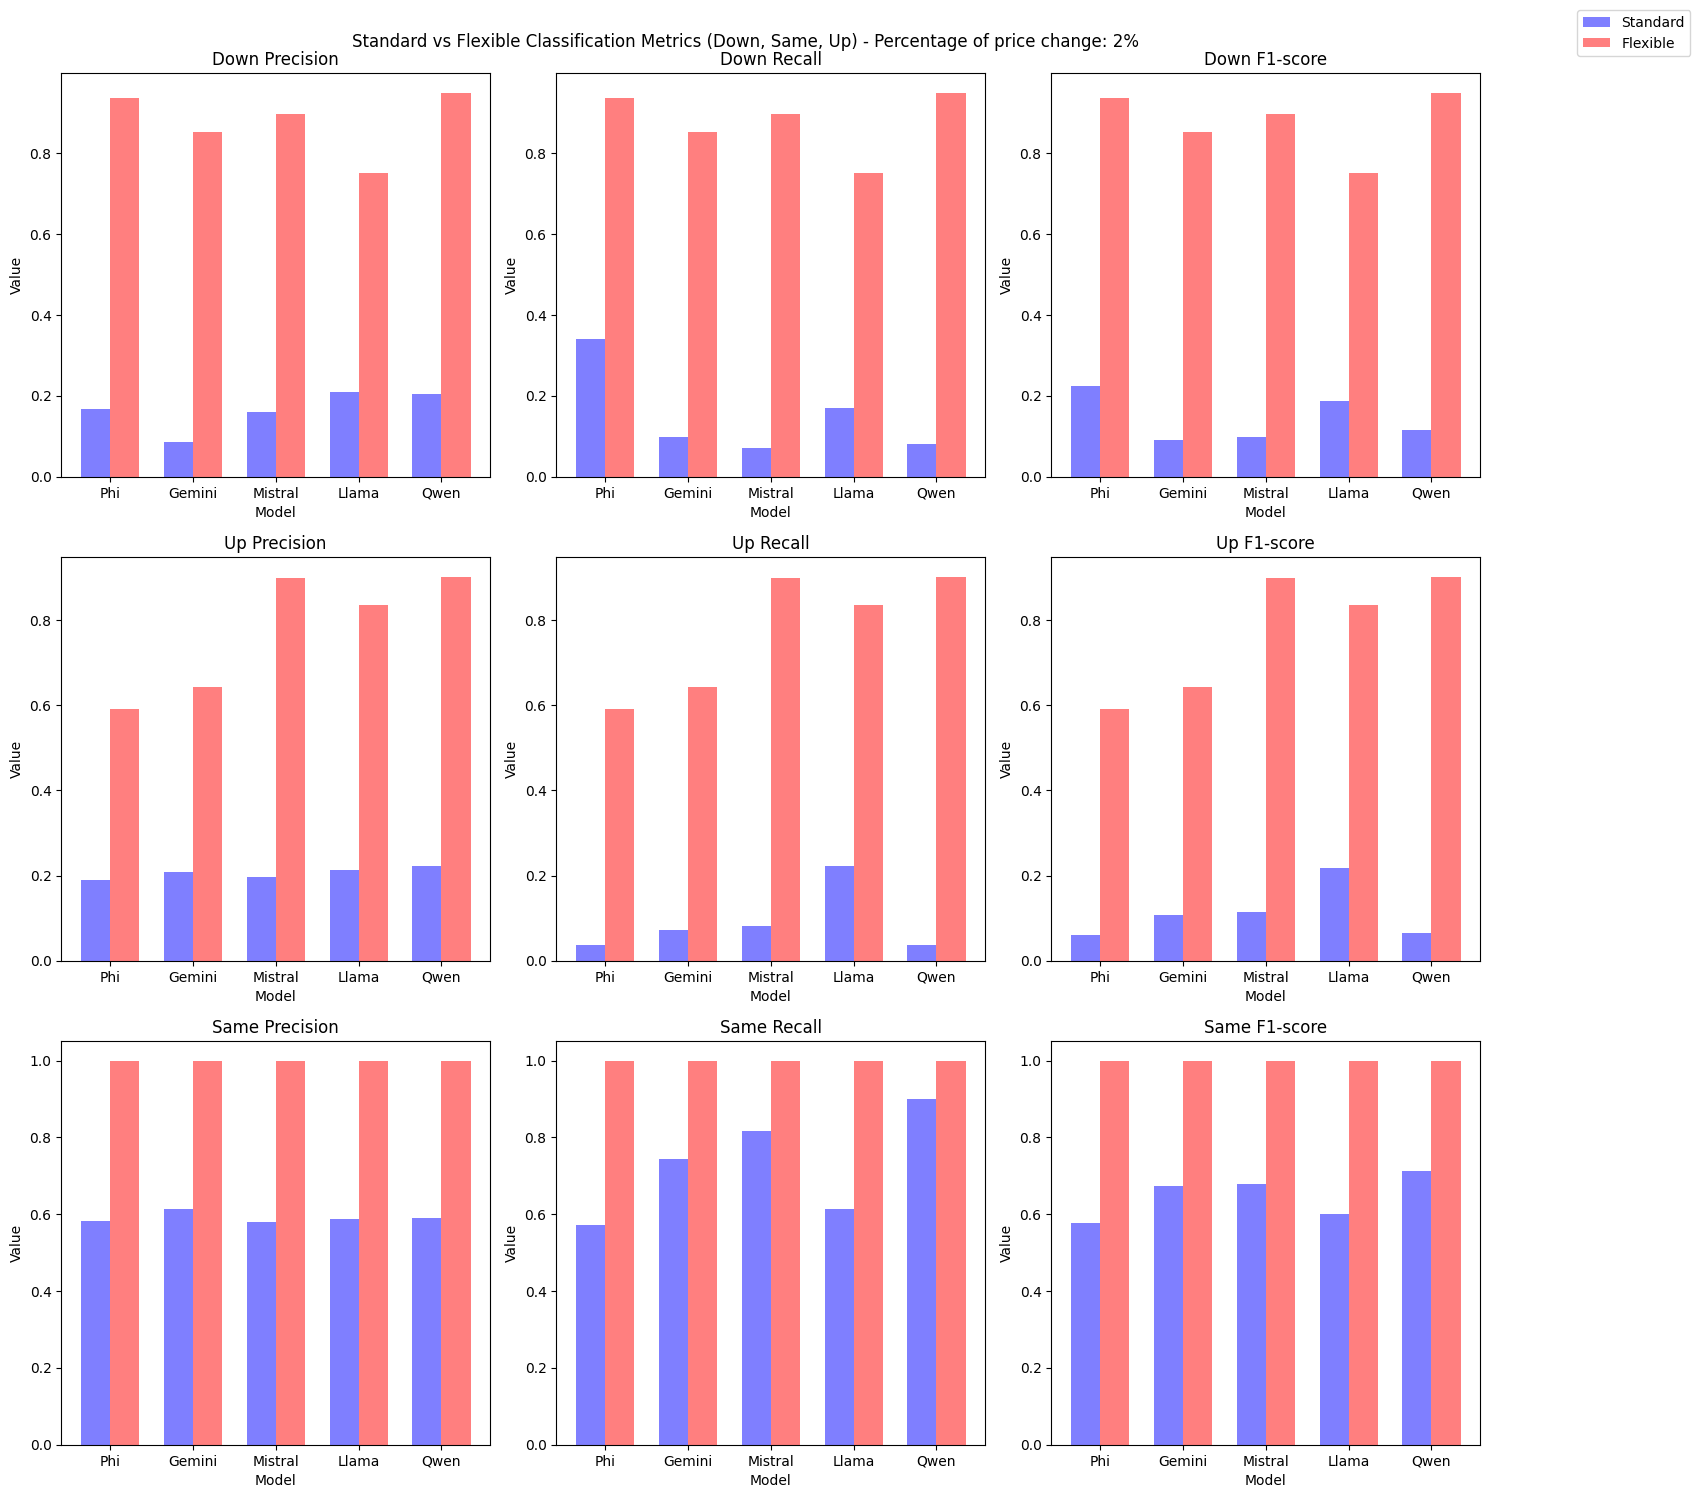

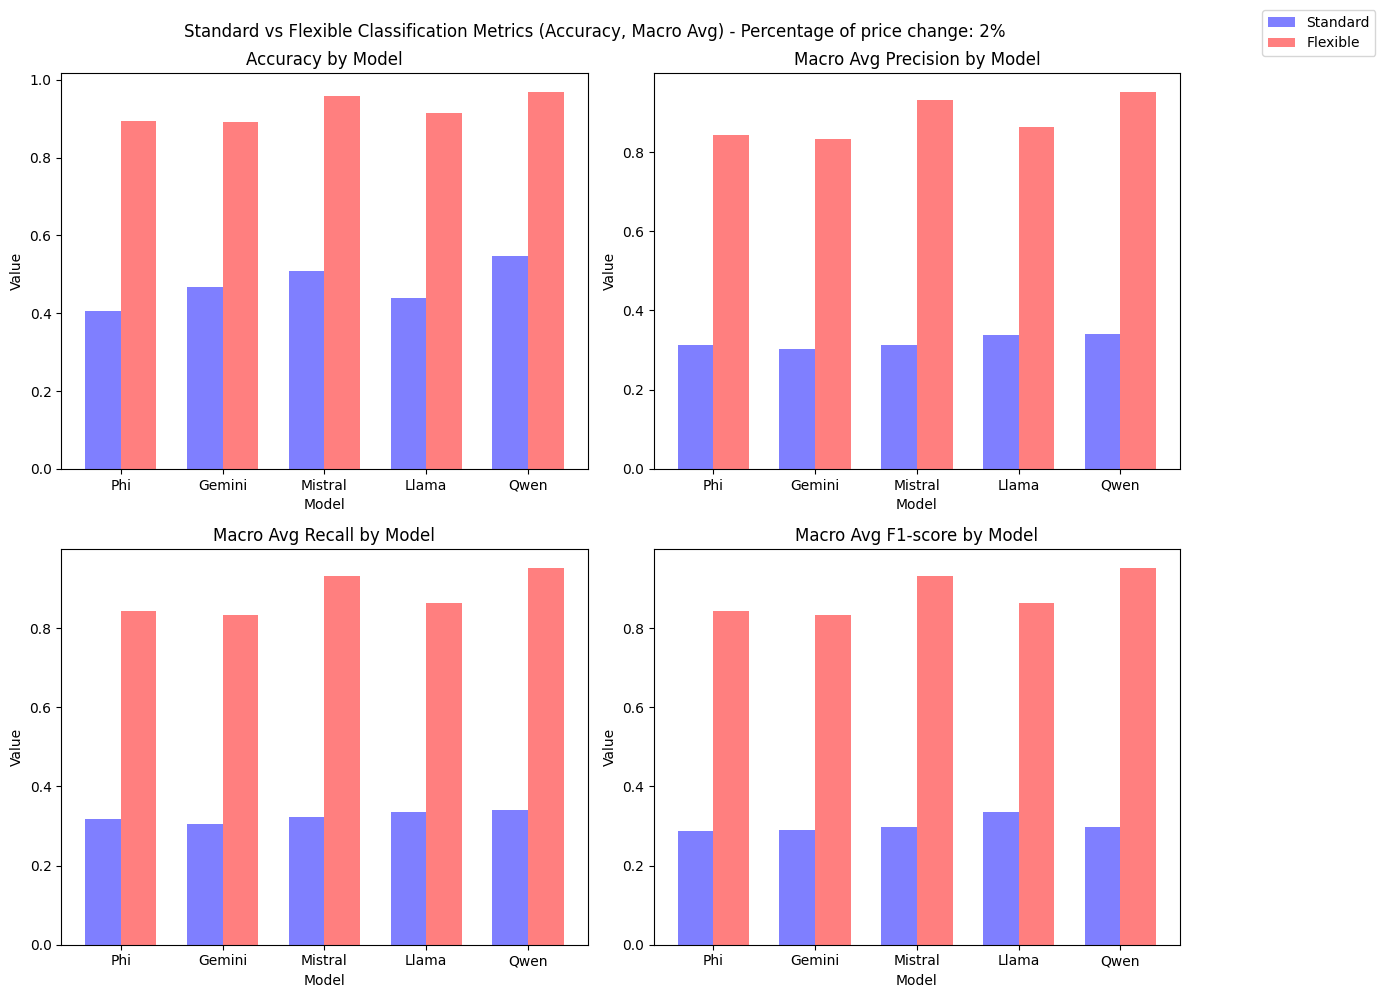

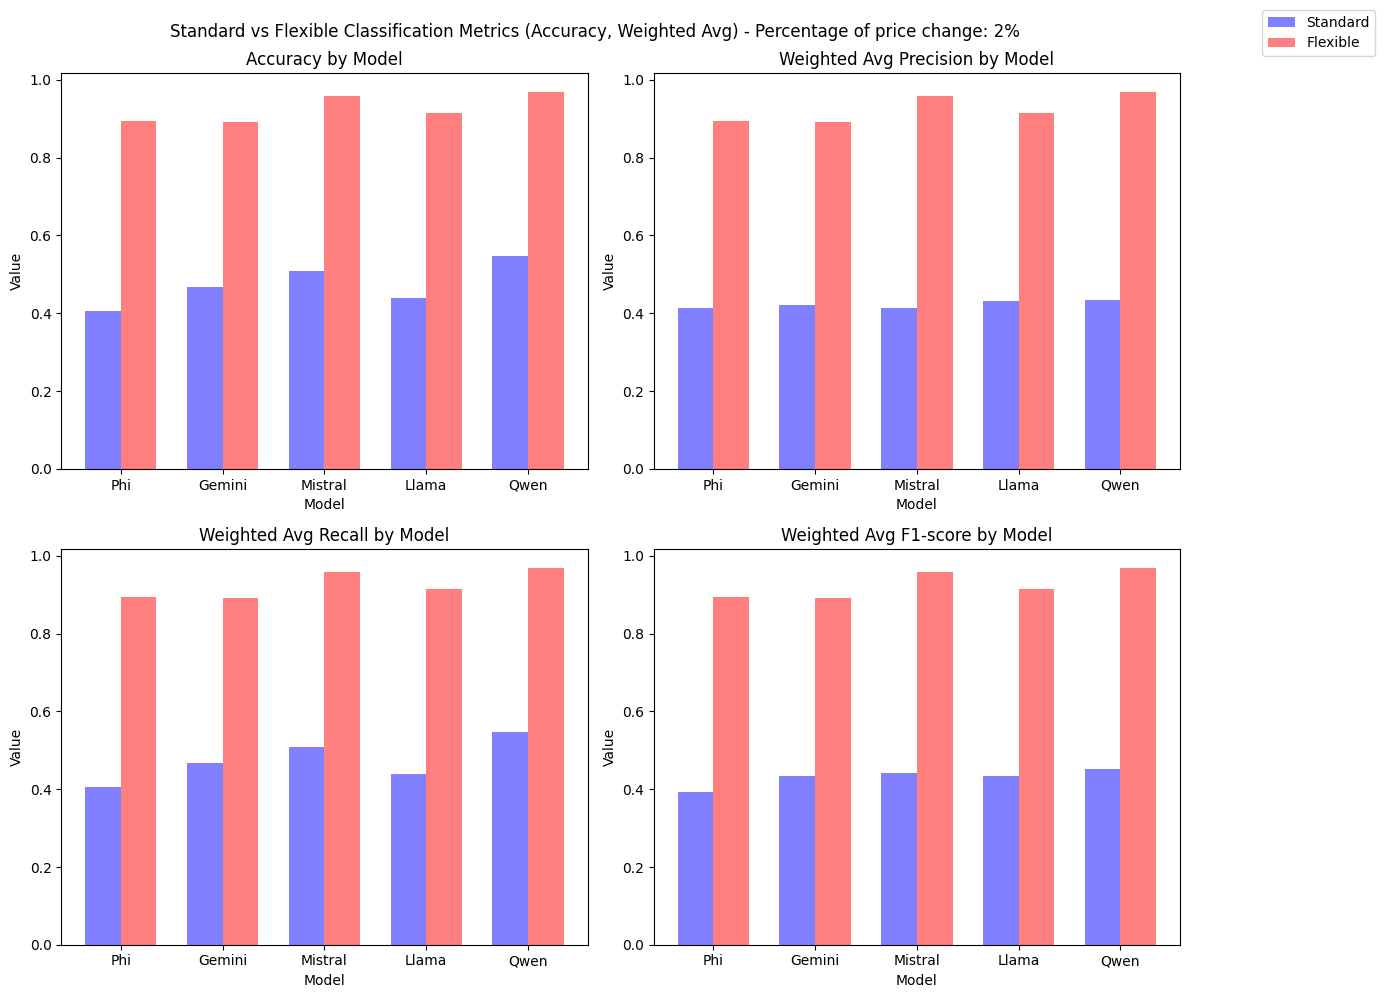

In [24]:
# Percentage of pct_price_change
percentages = [2]

for i in percentages:
    print(f"Percentage of pct_price_change: {i}%")

    # Recompute the trend column based on the pct_price_change
    # trend = 'up' if pct_price_change > i, trend = 'down' if pct_price_change < -i, else trend = 'same'
    df_phi['trend'] = df_phi['pct_price_change'].apply(lambda x: 'up' if x > i else ('down' if x < -i else 'same'))
    df_gemini['trend'] = df_gemini['pct_price_change'].apply(lambda x: 'up' if x > i else ('down' if x < -i else 'same'))
    df_mistral['trend'] = df_mistral['pct_price_change'].apply(lambda x: 'up' if x > i else ('down' if x < -i else 'same'))
    df_llama['trend'] = df_llama['pct_price_change'].apply(lambda x: 'up' if x > i else ('down' if x < -i else 'same'))
    df_qwen['trend'] = df_qwen['pct_price_change'].apply(lambda x: 'up' if x > i else ('down' if x < -i else 'same'))

    # Compute standard classification results
    print("Computing standard classification results...")
    name = f"standard_classification_results_{i}_pct_price_change"
    standard_classification_results = standard_classification(df_phi, df_gemini, df_mistral, df_llama, df_qwen, name)
    # Compute Flexible classification results
    print("Computing flexible classification results...")
    name = f"flexible_classification_results_{i}_pct_price_change"
    flexible_classification_results = flexible_classification(df_phi, df_gemini, df_mistral, df_llama, df_qwen, name)

    # Load the standard and flexible classification results
    path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "data", f"standard_classification_results_{i}_pct_price_change.csv")
    standard_classification_results = pd.read_csv(path)
    path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "data", f"flexible_classification_results_{i}_pct_price_change.csv")
    flexible_classification_results = pd.read_csv(path)

    # Plot down, same and up metrics
    name = f"standard_flexible_down_same_up_metrics_{i}_pct_price_change"
    plot_standard_flexible_down_same_up_metrics(standard_classification_results, flexible_classification_results, name, i)

    # Plot accuracy, macro avg metrics
    name = f"standard_flexible_accuracy_macro_avg_metrics_{i}_pct_price_change"
    plot_standard_flexible_accuracy_macro_avg_metrics(standard_classification_results, flexible_classification_results, name, i)

    # Plot accuracy, weighted avg metrics
    name = f"standard_flexible_accuracy_weighted_avg_metrics_{i}_pct_price_change"
    plot_standard_flexible_accuracy_weighted_avg_metrics(standard_classification_results, flexible_classification_results, name, i)

# Compare overall results

In [17]:
# Load the datasets
standard_classification_results_1_pct = pd.read_csv(os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "data", "standard_classification_results_1_pct_price_change.csv"))
flexible_classification_results_1_pct = pd.read_csv(os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "data", "flexible_classification_results_1_pct_price_change.csv"))

standard_classification_results_2_pct = pd.read_csv(os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "data", "standard_classification_results_2_pct_price_change.csv"))
flexible_classification_results_2_pct = pd.read_csv(os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "data", "flexible_classification_results_2_pct_price_change.csv"))

standard_classification_results_3_pct = pd.read_csv(os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "data", "standard_classification_results_3_pct_price_change.csv"))
flexible_classification_results_3_pct = pd.read_csv(os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "data", "flexible_classification_results_3_pct_price_change.csv"))

standard_classification_results_5_pct = pd.read_csv(os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "data", "standard_classification_results_5_pct_price_change.csv"))
flexible_classification_results_5_pct = pd.read_csv(os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "data", "flexible_classification_results_5_pct_price_change.csv"))

standard_classification_results_7_pct = pd.read_csv(os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "data", "standard_classification_results_7_pct_price_change.csv"))
flexible_classification_results_7_pct = pd.read_csv(os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "data", "flexible_classification_results_7_pct_price_change.csv"))

standard_classification_results_10_pct = pd.read_csv(os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "data", "standard_classification_results_10_pct_price_change.csv"))
flexible_classification_results_10_pct = pd.read_csv(os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "data", "flexible_classification_results_10_pct_price_change.csv"))

In [38]:
# Print the standard classification results as a table without index
print(f"Flexible Classification Results (10% price change)")
print(flexible_classification_results_10_pct.to_string(index=False))

Flexible Classification Results (10% price change)
  Model  Down Precision  Down Recall  Down F1-score  Same Precision  Same Recall  Same F1-score  Up Precision  Up Recall  Up F1-score  Accuracy  Macro avg Precision  Macro avg Recall  Macro avg F1-score  Weighted avg Precision  Weighted avg Recall  Weighted avg F1-score
    Phi        0.947368     0.947368       0.947368             1.0          1.0            1.0         0.525      0.525        0.525  0.993215             0.824123          0.824123            0.824123                0.993215             0.993215               0.993215
 Gemini        0.605263     0.605263       0.605263             1.0          1.0            1.0         0.450      0.450        0.450  0.988045             0.685088          0.685088            0.685088                0.988045             0.988045               0.988045
Mistral        0.894737     0.894737       0.894737             1.0          1.0            1.0         0.775      0.775        0.775  0

In [18]:
def plot_standard_accuracy_macro_avg_different_pct(
    standard_classification_results_1_pct,
    standard_classification_results_2_pct, 
    standard_classification_results_3_pct,
    standard_classification_results_5_pct, 
    standard_classification_results_7_pct,
    standard_classification_results_10_pct,
    path
    ):
    # Plot the Accuracy, Macro avg Precision, Macro avg Recall, Macro avg F1-score for each model and each classification type
    # For each subplot show the bar for Classification Type 1 (Standard) and Classification Type 2 (Flexible) for each percentage change

    # Create four plots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Define the metrics
    metrics = ['Accuracy', 'Macro avg Precision', 'Macro avg Recall', 'Macro avg F1-score']

    # Define the titles
    titles = ['Accuracy by Model', 'Macro Avg Precision by Model', 'Macro Avg Recall by Model', 'Macro Avg F1-score by Model']

    # Loop through the metrics and titles
    for i, metric in enumerate(metrics):
        ax = axs[i // 2, i % 2]  # Subplot positioning
        width = 0.15  # the width of the bars
        x = np.arange(len(standard_classification_results_2_pct['Model']))  # the label locations

        # Plot the bars for Standard classification
        ax.bar(x - 2*width, standard_classification_results_1_pct[metric], width, label='Standard (1%)', color='blue', alpha=0.5)
        ax.bar(x - width, standard_classification_results_2_pct[metric], width, label='Standard (2%)', color='green', alpha=0.5)
        ax.bar(x, standard_classification_results_3_pct[metric], width, label='Standard (3%)', color='red', alpha=0.5)
        ax.bar(x + width, standard_classification_results_5_pct[metric], width, label='Standard (5%)', color='purple', alpha=0.5)
        ax.bar(x + 2*width, standard_classification_results_7_pct[metric], width, label='Standard (7%)', color='orange', alpha=0.5)
        ax.bar(x + 3*width, standard_classification_results_10_pct[metric], width, label='Standard (10%)', color='black', alpha=0.5)

        # Set the x-ticks to be the model names
        ax.set_xticks(x)
        ax.set_xticklabels(standard_classification_results_2_pct['Model'])

        # Set the title
        ax.set_title(titles[i])

        # Set the y-label
        ax.set_ylabel("Value")

        # Set the x-label
        ax.set_xlabel("Model")

        # Set model name horizontal
        ax.set_xticklabels(standard_classification_results_2_pct['Model'], rotation=0)

    # Add title to the figure
    fig.suptitle("Standard Classification Metrics (Accuracy, Macro Avg) - Different Percentage Change")

    # Adjust layout
    plt.tight_layout()

    # Show only one legend for the entire figure
    fig.legend(['Standard (1%)', 'Standard (2%)', 'Standard (3%)', 'Standard (5%)', 'Standard (7%)', 'Standard (10%)'], loc='upper left', bbox_to_anchor=(1, 0.938), ncol=1)

    # Display the plots
    plt.show()

    # Save the plot as pdf and png files
    path = path + ".pdf"
    fig.savefig(path, bbox_inches='tight')
    path = path + ".png"
    fig.savefig(path, bbox_inches='tight')

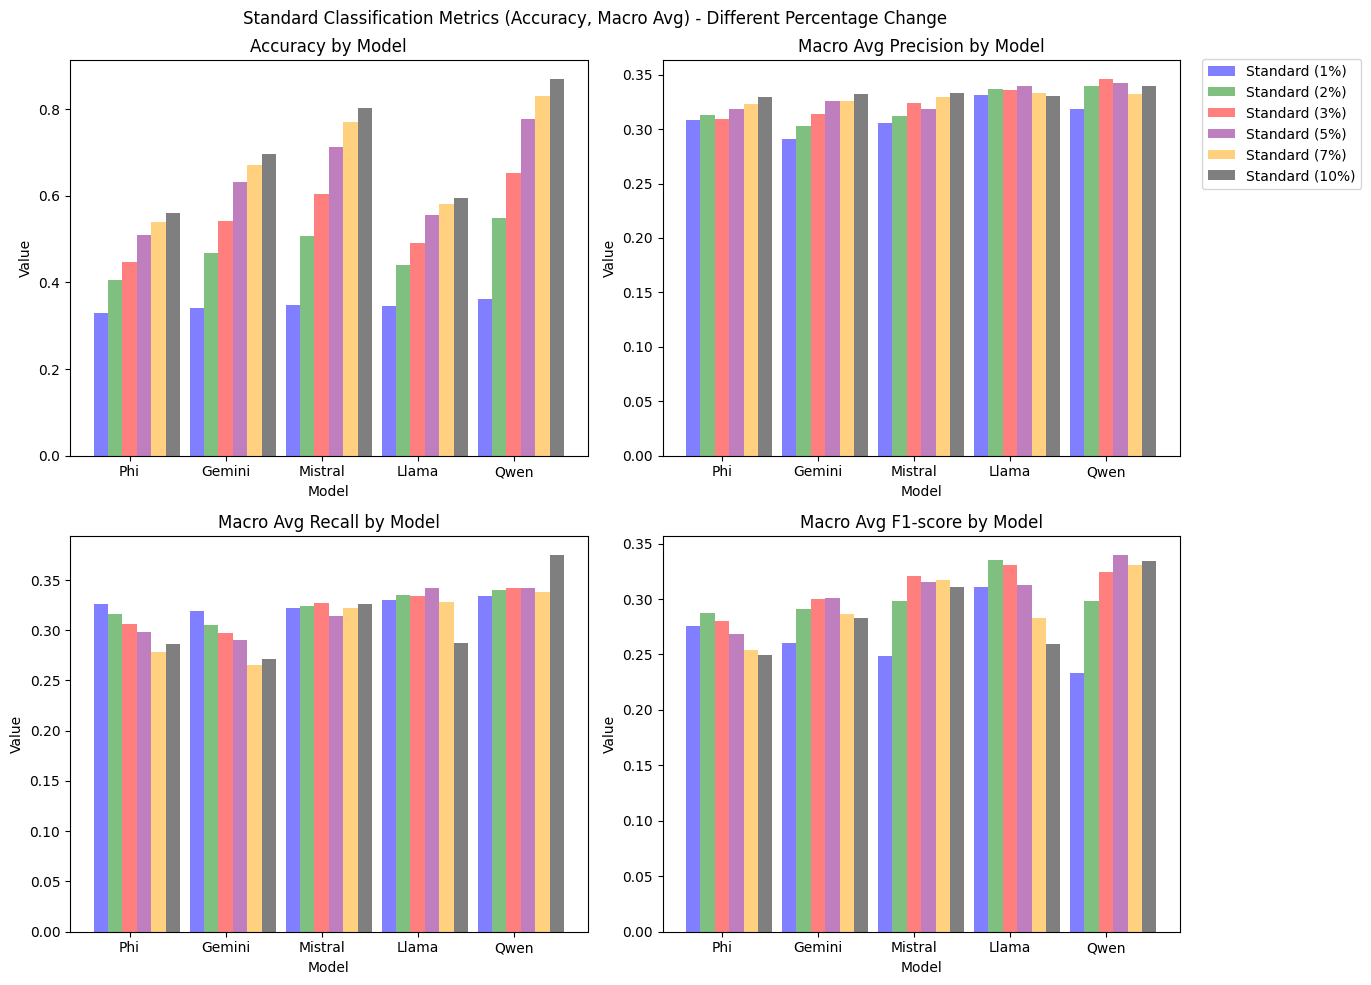

In [19]:
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "standard_flexible_accuracy_macro_avg_different_pct")
plot_standard_accuracy_macro_avg_different_pct(
    standard_classification_results_1_pct,
    standard_classification_results_2_pct, 
    standard_classification_results_3_pct,
    standard_classification_results_5_pct, 
    standard_classification_results_7_pct,
    standard_classification_results_10_pct,
    path
)

In [20]:
def plot_flexible_accuracy_macro_avg_different_pct(
    flexible_classification_results_1_pct,
    flexible_classification_results_2_pct, 
    flexible_classification_results_3_pct,
    flexible_classification_results_5_pct, 
    flexible_classification_results_7_pct,
    flexible_classification_results_10_pct,
    path
    ):
    # Plot the Accuracy, Macro avg Precision, Macro avg Recall, Macro avg F1-score for each model and each classification type
    # For each subplot show the bar for Classification Type 1 (Standard) and Classification Type 2 (Flexible) for each percentage change

    # Create four plots
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    # Define the metrics
    metrics = ['Accuracy', 'Macro avg Precision', 'Macro avg Recall', 'Macro avg F1-score']

    # Define the titles
    titles = ['Accuracy by Model', 'Macro Avg Precision by Model', 'Macro Avg Recall by Model', 'Macro Avg F1-score by Model']

    # Loop through the metrics and titles
    for i, metric in enumerate(metrics):
        ax = axs[i // 2, i % 2]  # Subplot positioning
        width = 0.15  # the width of the bars
        x = np.arange(len(standard_classification_results_2_pct['Model']))  # the label locations

        # Plot the bars for Flexible classification
        ax.bar(x - 2*width, flexible_classification_results_1_pct[metric], width, label='Flexible (1%)', color='blue', alpha=0.5)
        ax.bar(x - width, flexible_classification_results_2_pct[metric], width, label='Flexible (2%)', color='green', alpha=0.5)
        ax.bar(x, flexible_classification_results_3_pct[metric], width, label='Flexible (3%)', color='red', alpha=0.5)
        ax.bar(x + width, flexible_classification_results_5_pct[metric], width, label='Flexible (5%)', color='purple', alpha=0.5)
        ax.bar(x + 2*width, flexible_classification_results_7_pct[metric], width, label='Flexible (7%)', color='orange', alpha=0.5)
        ax.bar(x + 3*width, flexible_classification_results_10_pct[metric], width, label='Flexible (10%)', color='black', alpha=0.5)

        # Set the x-ticks to be the model names
        ax.set_xticks(x)
        ax.set_xticklabels(flexible_classification_results_2_pct['Model'])

        # Set the title
        ax.set_title(titles[i])

        # Set the y-label
        ax.set_ylabel("Value")

        # Set the x-label
        ax.set_xlabel("Model")

        # Set model name horizontal
        ax.set_xticklabels(flexible_classification_results_2_pct['Model'], rotation=0)

    # Add title to the figure
    fig.suptitle("Flexible Classification Metrics (Accuracy, Macro Avg) - Different percentages of price change")

    # Adjust layout
    plt.tight_layout()

    # Show only one legend for the entire figure
    fig.legend(['Flexible (1%)', 'Flexible (2%)', 'Flexible (3%)', 'Flexible (5%)', 'Flexible (7%)', 'Flexible (10%)'], loc='upper left', bbox_to_anchor=(1, 0.938), ncol=1)

    # Display the plots
    plt.show()

    # Save the plot as pdf and png files
    path = path + ".pdf"
    fig.savefig(path, bbox_inches='tight')
    path = path + ".png"
    fig.savefig(path, bbox_inches='tight')

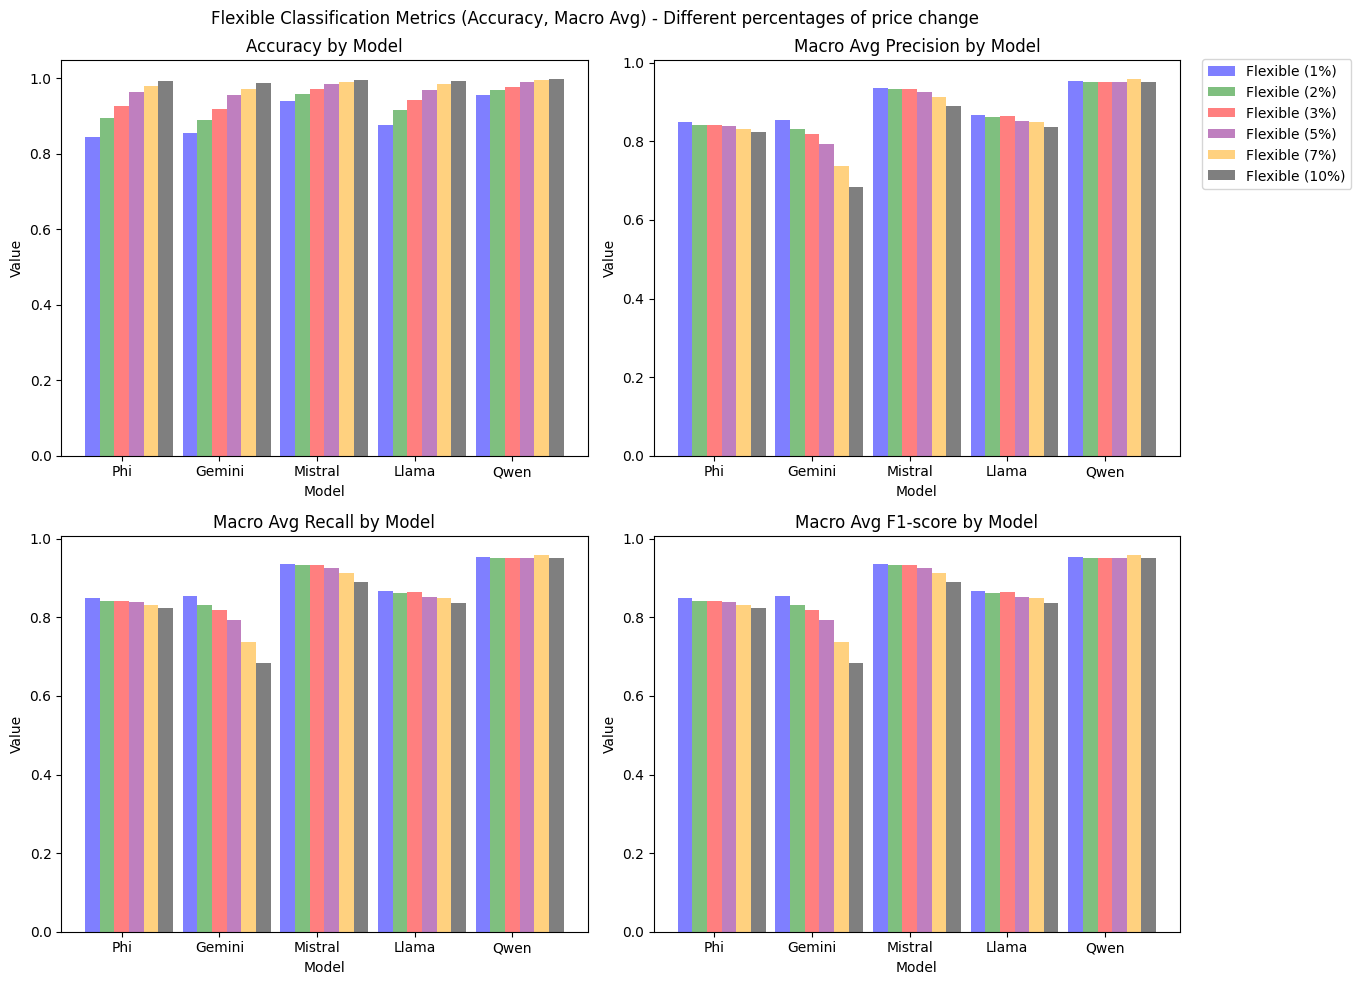

In [21]:
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "flexible_accuracy_macro_avg_different_pct")
plot_flexible_accuracy_macro_avg_different_pct(
    flexible_classification_results_1_pct,
    flexible_classification_results_2_pct, 
    flexible_classification_results_3_pct,
    flexible_classification_results_5_pct, 
    flexible_classification_results_7_pct,
    flexible_classification_results_10_pct,
    path
)

In [22]:
def plot_standard_flexible_accuracy_macro_avg_different_pct(
    standard_classification_results_1_pct,
    flexible_classification_results_1_pct,
    standard_classification_results_2_pct, 
    flexible_classification_results_2_pct, 
    standard_classification_results_3_pct,
    flexible_classification_results_3_pct,
    standard_classification_results_5_pct, 
    flexible_classification_results_5_pct, 
    standard_classification_results_7_pct, 
    flexible_classification_results_7_pct,
    standard_classification_results_10_pct,
    flexible_classification_results_10_pct,
    path
    ):
    # Confront the standard and flexible classification results for each percentage change in the same plot

    # Create four plots
    fig, axs = plt.subplots(2, 2, figsize=(15, 10)) 

    # Define the metrics
    metrics = ['Accuracy', 'Macro avg Precision', 'Macro avg Recall', 'Macro avg F1-score']

    # Define the titles
    titles = ['Accuracy by Model', 'Macro Avg Precision by Model', 'Macro Avg Recall by Model', 'Macro Avg F1-score by Model']

    # Loop through the metrics and titles
    for i, metric in enumerate(metrics):
        ax = axs[i // 2, i % 2]  # Subplot positioning
        width = 0.07  # the width of the bars
        x = np.arange(len(standard_classification_results_2_pct['Model']))  # the label locations

        # Plot the bars for Standard classification
        ax.bar(x - 6*width, standard_classification_results_1_pct[metric], width, label='Standard (1%)', color='blue', alpha=0.5)
        ax.bar(x - 5*width, flexible_classification_results_1_pct[metric], width, label='Flexible (1%)', color='green', alpha=0.5)
        ax.bar(x - 4*width, standard_classification_results_2_pct[metric], width, label='Standard (2%)', color='red', alpha=0.5)
        ax.bar(x - 3*width, flexible_classification_results_2_pct[metric], width, label='Flexible (2%)', color='purple', alpha=0.5)
        ax.bar(x - 2*width, standard_classification_results_3_pct[metric], width, label='Standard (3%)', color='orange', alpha=0.5)
        ax.bar(x - width, flexible_classification_results_3_pct[metric], width, label='Flexible (3%)', color='black', alpha=0.5)
        ax.bar(x, standard_classification_results_5_pct[metric], width, label='Standard (5%)', color='yellow', alpha=0.5)
        ax.bar(x + width, flexible_classification_results_5_pct[metric], width, label='Flexible (5%)', color='pink', alpha=0.5)
        ax.bar(x + 2*width, standard_classification_results_7_pct[metric], width, label='Standard (7%)', color='brown', alpha=0.5)
        ax.bar(x + 3*width, flexible_classification_results_7_pct[metric], width, label='Flexible (7%)', color='grey', alpha=0.5)
        ax.bar(x + 4*width, standard_classification_results_10_pct[metric], width, label='Standard (10%)', color='cyan', alpha=0.5)
        ax.bar(x + 5*width, flexible_classification_results_10_pct[metric], width, label='Flexible (10%)', color='magenta', alpha=0.5)


        # Set the x-ticks to be the model names
        ax.set_xticks(x)
        ax.set_xticklabels(standard_classification_results_2_pct['Model'])

        # Set the title
        ax.set_title(titles[i])

        # Set the y-label
        ax.set_ylabel("Value")

        # Set the x-label
        ax.set_xlabel("Model")

        # Set model name horizontal
        ax.set_xticklabels(standard_classification_results_2_pct['Model'], rotation=0)

    # Add title to the figure
    fig.suptitle("Standard vs Flexible Classification Metrics (Accuracy, Macro Avg) - Different percentages of price change")

    # Adjust layout
    plt.tight_layout()

    # Show only one legend for the entire figure
    fig.legend(['Standard (1%)', 'Flexible (1%)', 'Standard (2%)', 'Flexible (2%)', 'Standard (3%)', 'Flexible (3%)', 'Standard (5%)', 'Flexible (5%)', 'Standard (7%)', 'Flexible (7%)', 'Standard (10%)', 'Flexible (10%)'], loc='upper left', bbox_to_anchor=(1, 0.938), ncol=1)

    # Display the plots
    plt.show()

    # Save the plot as pdf and png files
    path = path + ".pdf"
    fig.savefig(path, bbox_inches='tight')
    path = path + ".png"
    fig.savefig(path, bbox_inches='tight')

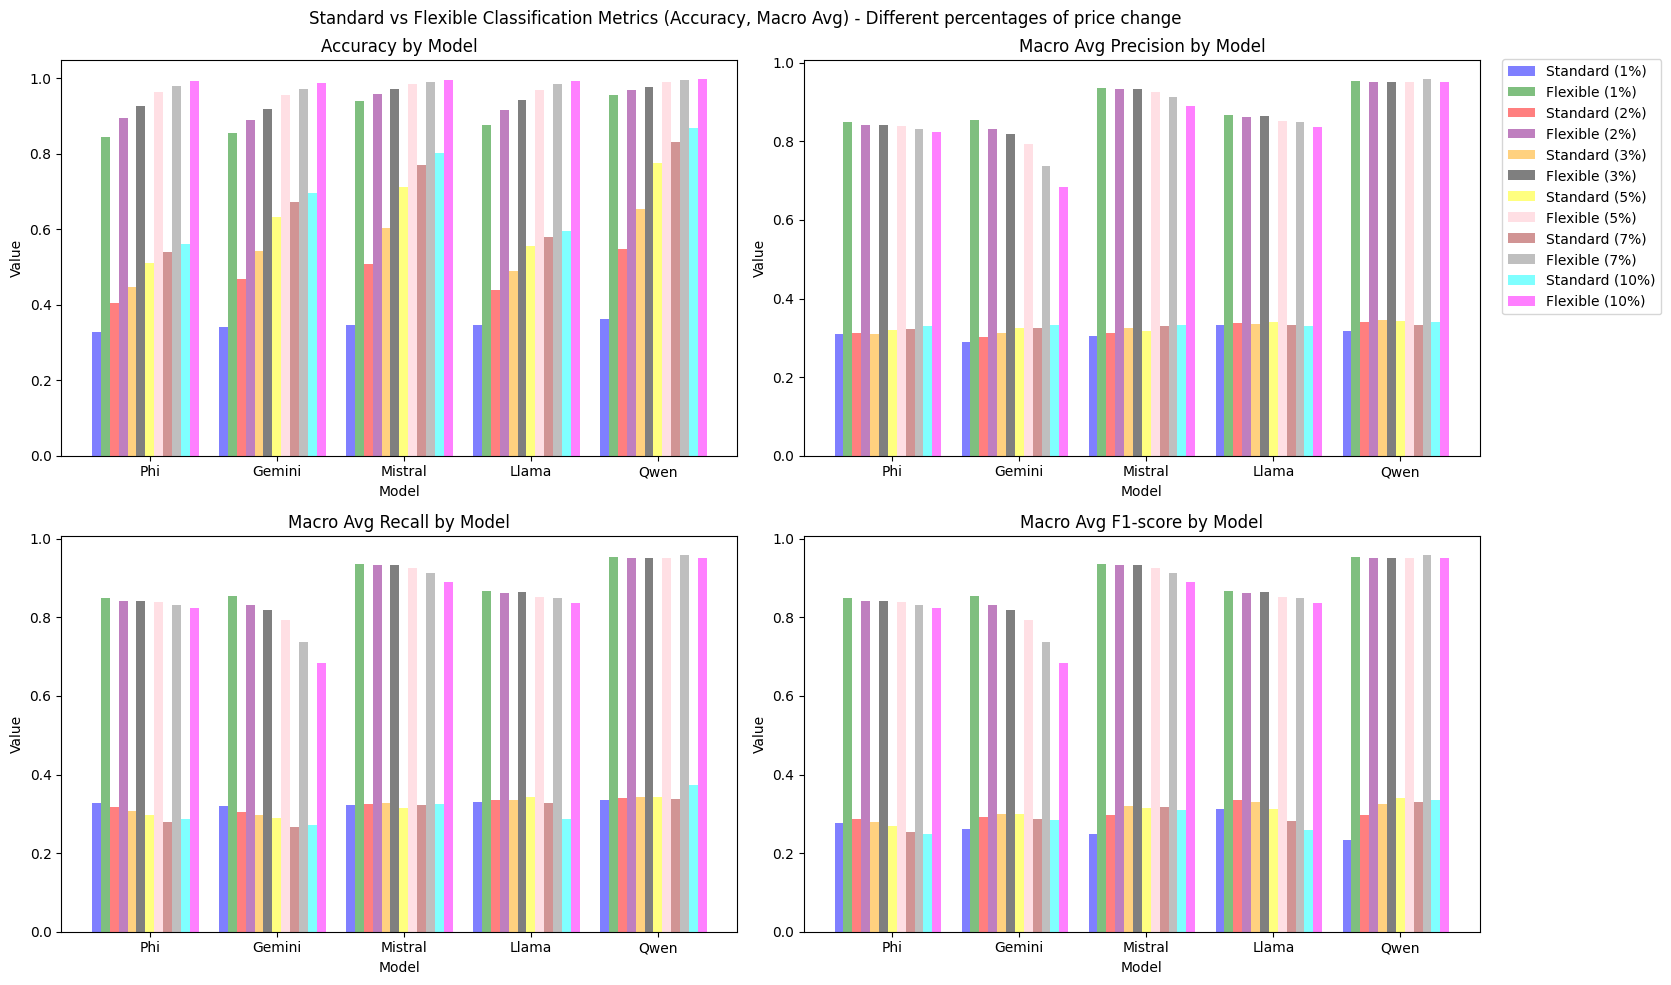

In [23]:
path = os.path.join(ROOT, DATA_EXPLORATORY_ANALYSIS_PATH, "plots", "standard_flexible_accuracy_macro_avg_different_pct")
plot_standard_flexible_accuracy_macro_avg_different_pct(
    standard_classification_results_1_pct,
    flexible_classification_results_1_pct,
    standard_classification_results_2_pct, 
    flexible_classification_results_2_pct, 
    standard_classification_results_3_pct,
    flexible_classification_results_3_pct,
    standard_classification_results_5_pct, 
    flexible_classification_results_5_pct, 
    standard_classification_results_7_pct,
    flexible_classification_results_7_pct,
    standard_classification_results_10_pct,
    flexible_classification_results_10_pct,
    path
)